#### Обработка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pymc3 import  *

%matplotlib inline

In [2]:
from scipy import optimize as opt 
import scipy
import scipy.odr as odr

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
data = pd.read_csv('data/experiment.csv')

In [5]:
mean = (data['value_1'] + data['value_2'] + data['value_3'] + data['value_4'] + data['value_5'] + data['value_6'])/6

In [6]:
disp = np.sqrt(np.square(data['value_1'] - mean) + 
              np.square(data['value_2'] - mean) + 
              np.square(data['value_3'] - mean) + 
              np.square(data['value_4'] - mean) +
              np.square(data['value_5'] - mean) + 
              np.square(data['value_6'] - mean))/5

In [7]:
Al_dp = [19.8, 39.7, 59.4, 79.5, 99.1, 119.2, 139.4]
Fe_dp = [10.0, 20.1, 30.0, 40.2, 50.2, 60.3, 70.4]
Pb_dp = [4.9, 9.7, 14.8, 19.2, 23.4, 27.8, 32.6]

In [8]:
data['Name'].as_matrix()[0]

'Background'

In [9]:
print(data['Name'].as_matrix()[2:9])
Al = mean[2:9] - mean[0]

['Al_1' 'Al_2' 'Al_3' 'Al_4' 'Al_5' 'Al_6' 'Al_7']


In [10]:
print(data['Name'].as_matrix()[9:16])
Fe = mean[9:16] - mean[0]

['Fe_1' 'Fe_2' 'Fe_3' 'Fe_4' 'Fe_5' 'Fe_6' 'Fe_7']


In [11]:
print(data['Name'].as_matrix()[16:23])
Pb = mean[16:23] - mean[0]

['Pb_1' 'Pb_2' 'Pb_3' 'Pb_4' 'Pb_5' 'Pb_6' 'Pb_7']


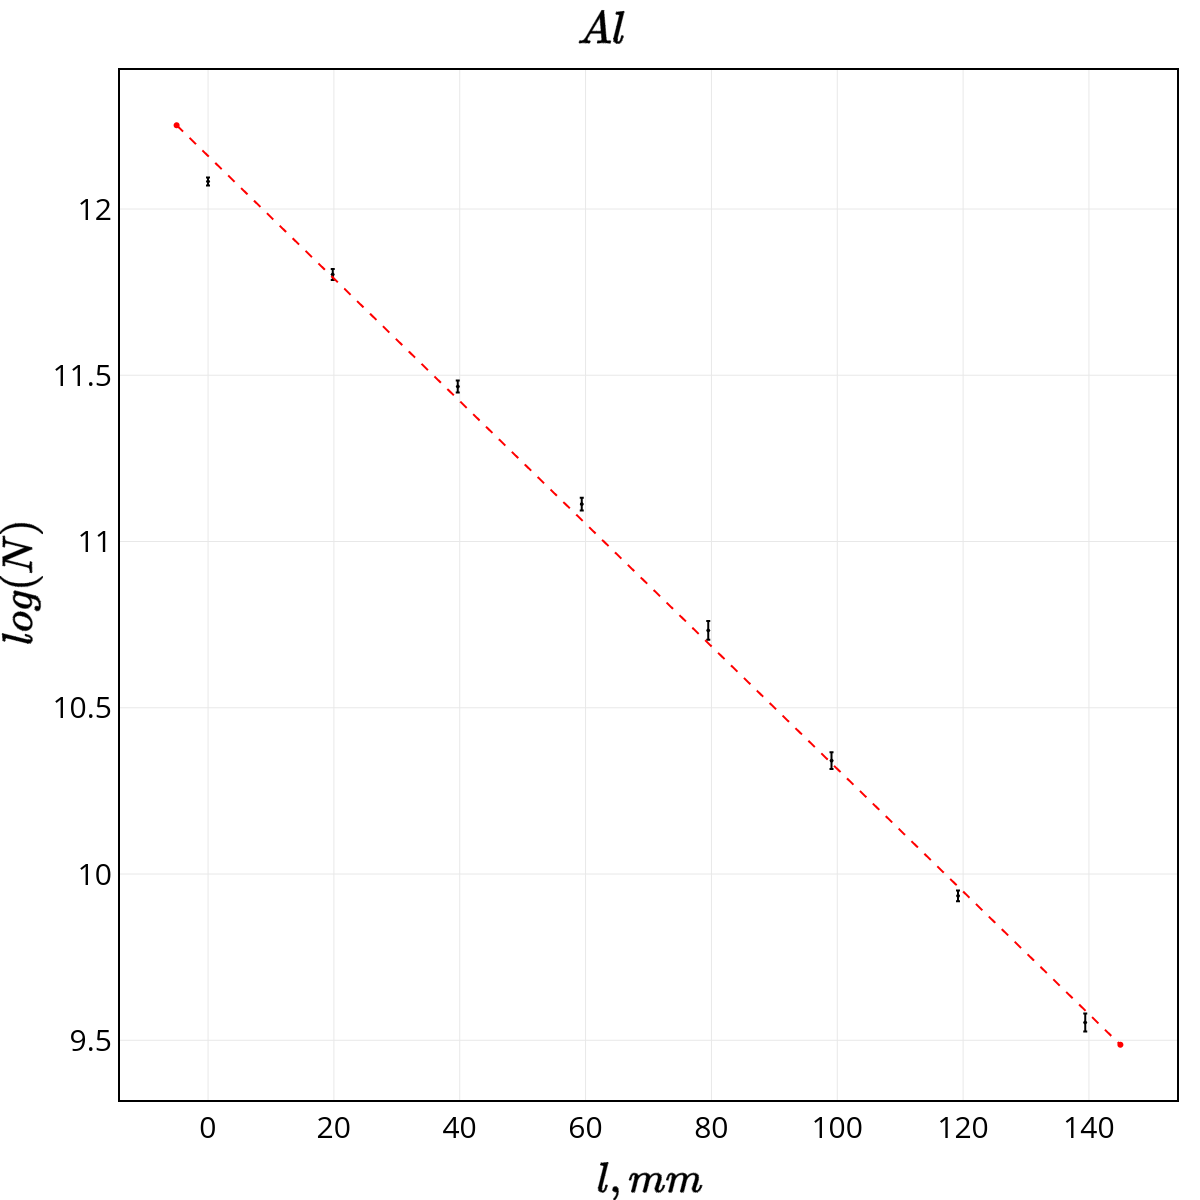

In [12]:
trace1 = go.Scatter(
    x = Al_dp,
    y = np.log(Al),
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = 10 * disp[2:9] / Al,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [0.],
    y = np.log([mean[1]]),
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = [np.array(disp[1]) / mean[1] * 10],
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace3 = go.Scatter(
    x = [-5, 145],
    y = [12.15975326 - 5 * -0.01843578, 12.15975326 + 145 * -0.01843578],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    title = "$Al$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$l, mm$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$log(N)$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [13]:
X = np.append(0.,  Al_dp)
Y = np.append(np.log([mean[1]]), np.log(Al))
def f(x, a, b):
    return a + b * x
parameters_opt_2, parameters_cov_2 = opt.curve_fit(f, X, Y)
print(parameters_opt_2)
print(np.sqrt(np.diag(parameters_cov_2)))
print(np.sqrt(np.diag(parameters_cov_2)) / parameters_opt_2)

[ 12.15975326  -0.01843578]
[ 0.03044324  0.00036623]
[ 0.00250361 -0.01986535]


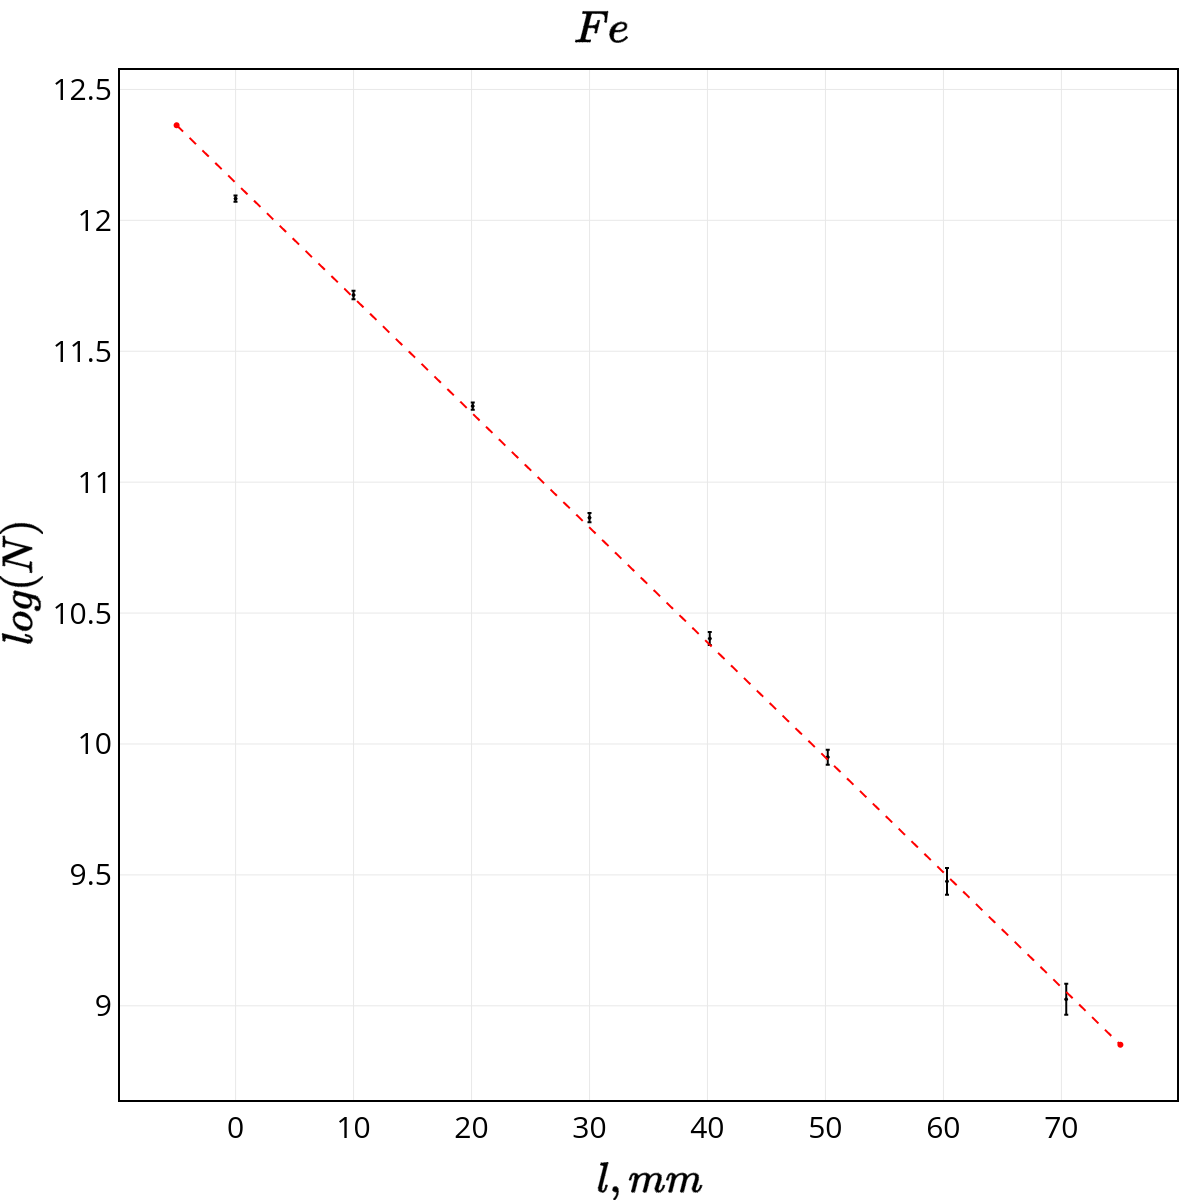

In [14]:
trace1 = go.Scatter(
    x = Fe_dp,
    y = np.log(Fe),
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = 10 * disp[9:16] / Fe,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [0.],
    y = np.log([mean[1]]),
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = [np.array(disp[1]) / mean[1] * 10],
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace3 = go.Scatter(
    x = [-5, 75],
    y = [12.14366665 - 5 * -0.04389966, 12.14366665 + 75 * -0.04389966],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    title = "$Fe$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$l, mm$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$log(N)$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

In [15]:
X = np.append(0.,  Fe_dp)
Y = np.append(np.log([mean[1]]), np.log(Fe))
def f(x, a, b):
    return a + b * x
parameters_opt_2, parameters_cov_2 = opt.curve_fit(f, X, Y)
print(parameters_opt_2)
print(np.sqrt(np.diag(parameters_cov_2)))
print(np.sqrt(np.diag(parameters_cov_2)) / parameters_opt_2)

[ 12.14366665  -0.04389966]
[ 0.0234574   0.00055811]
[ 0.00193166 -0.01271325]


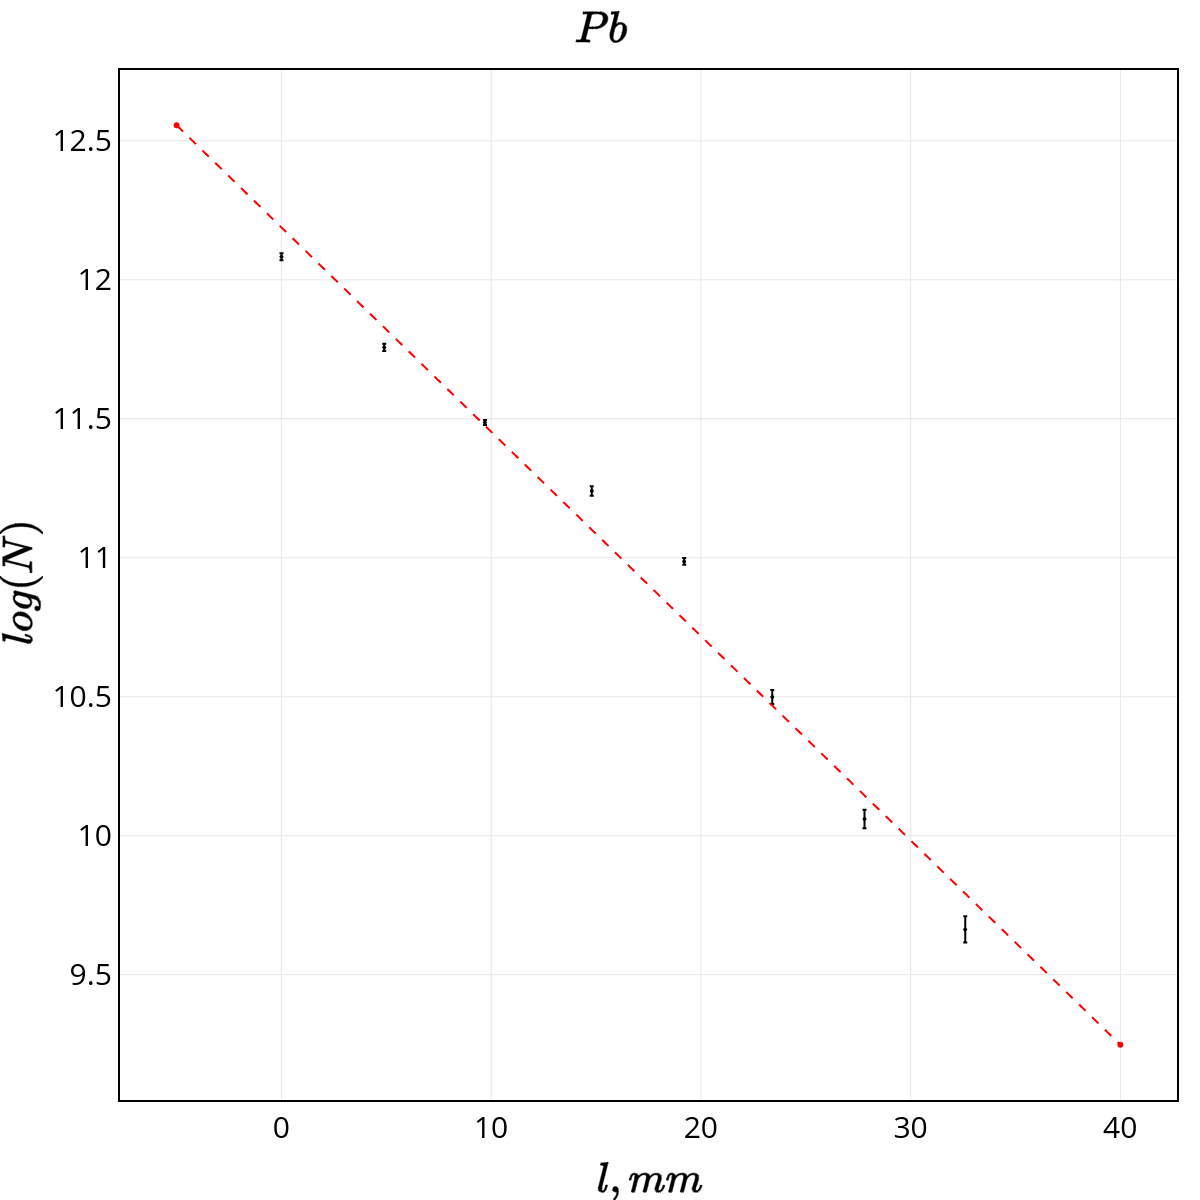

In [16]:
trace1 = go.Scatter(
    x = Pb_dp,
    y = np.log(Pb),
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = 10 * disp[16:23] / Pb,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = [0.],
    y = np.log([mean[1]]),
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = [np.array(disp[1]) / mean[1] * 10],
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace3 = go.Scatter(
    x = [-5, 40],   
    y = [12.18843084 - 5 * -0.07351632, 12.18843084 + 40 * -0.07351632],
    line = dict(
        color = ('#ff0000'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    title = "$Pb$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$l, mm$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$log(N)$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)

In [17]:
X = np.append(0.,  Pb_dp)
Y = np.append(np.log([mean[1]]), np.log(Pb))
def f(x, a, b):
    return a + b * x
parameters_opt_2, parameters_cov_2 = opt.curve_fit(f, X, Y)
print(parameters_opt_2)
print(np.sqrt(np.diag(parameters_cov_2)))
print(np.sqrt(np.diag(parameters_cov_2)) / parameters_opt_2)

[ 12.18843084  -0.07351632]
[ 0.08662193  0.00440827]
[ 0.0071069  -0.05996314]
